<a href="https://colab.research.google.com/github/ArnoldoOliva/AprendizajeAutomatico/blob/main/FeatureSelection_Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [6]:
pd.set_option("display.max_columns",None)
loans=pd.read_csv("/content/drive/MyDrive/loansmodified1.csv")
loans

,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,Terms_comp
0,445299.0,2006-02-07,162.0,2.0,2.0,0.0,0.0,15100.0,1.0,0,0,2006-03-31,253400.0,0.0,1.0,0.0,253400.0,190050.0,1,12,0.0,1.139270e+09,1.143763e+09,4492800.0,NaN
1,722211.0,2006-02-07,126.0,7.0,1.0,0.0,0.0,1.0,1.0,0,0,2006-04-30,137300.0,0.0,1.0,0.0,137300.0,116705.0,2,24,0.0,1.139270e+09,1.146355e+09,7084800.0,NaN
2,611110.0,2006-02-07,83.0,18.0,2.0,5.0,23.0,1.0,1.0,1,0,2006-02-28,438541.0,0.0,1.0,0.0,100000.0,50000.0,3,28,0.0,1.139270e+09,1.141085e+09,1814400.0,ALto
3,238140.0,2006-02-07,84.0,4.0,1.0,0.0,4.0,1.0,1.0,1,0,2006-02-28,51440.0,0.0,1.0,0.0,35000.0,17500.0,4,30,1.0,1.139270e+09,1.141085e+09,1814400.0,ALto
4,532490.0,2006-02-07,60.0,3.0,1.0,0.0,0.0,1.0,1.0,0,0,2006-05-31,50000.0,0.0,1.0,0.0,50000.0,42500.0,5,32,1.0,1.139270e+09,1.149034e+09,9763200.0,ALto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17833,514199.0,2006-02-28,43.0,1.0,2.0,2.0,1.0,1.0,1.0,0,0,2006-03-31,5000.0,0.0,0.0,3460.0,5000.0,4250.0,17042,25897,1.0,1.141085e+09,1.143763e+09,2678400.0,ALto
17834,541613.0,2005-02-14,84.0,7.0,1.0,0.0,7.0,1.0,1.0,1,0,2005-08-31,75000.0,0.0,1.0,0.0,75000.0,37500.0,17041,25898,0.0,1.108339e+09,1.125446e+09,17107200.0,ALto
17835,541613.0,2005-02-14,84.0,7.0,1.0,0.0,7.0,1.0,1.0,1,0,2005-09-30,22711.0,0.0,1.0,0.0,5000.0,2500.0,17041,25899,0.0,1.108339e+09,1.128038e+09,19699200.0,ALto
17836,424310.0,2005-02-14,60.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,2005-07-31,37000.0,0.0,1.0,0.0,37000.0,18500.0,15663,25900,0.0,1.108339e+09,1.122768e+09,14428800.0,ALto


In [10]:
loans["SCIAN category"] = pd.factorize(loans.NAICS)[0] + 1
loans

<ipython-input-10-5c9bc9188b7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["SCIAN category"] = pd.factorize(loans.NAICS)[0] + 1


,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,Terms_comp,SCIAN category
2,611110.0,2006-02-07,83.0,18.0,2.0,5.0,23.0,1.0,1.0,1,0,2006-02-28,438541.0,0.0,1.0,0.0,100000.0,50000.0,3,28,0.0,1.139270e+09,1.141085e+09,1814400.0,ALto,1
3,238140.0,2006-02-07,84.0,4.0,1.0,0.0,4.0,1.0,1.0,1,0,2006-02-28,51440.0,0.0,1.0,0.0,35000.0,17500.0,4,30,1.0,1.139270e+09,1.141085e+09,1814400.0,ALto,2
4,532490.0,2006-02-07,60.0,3.0,1.0,0.0,0.0,1.0,1.0,0,0,2006-05-31,50000.0,0.0,1.0,0.0,50000.0,42500.0,5,32,1.0,1.139270e+09,1.149034e+09,9763200.0,ALto,3
5,541611.0,2006-02-07,80.0,2.0,1.0,4.0,6.0,1.0,2.0,1,0,2006-05-31,63076.0,0.0,1.0,0.0,25000.0,12500.0,6,34,0.0,1.139270e+09,1.149034e+09,9763200.0,ALto,4
6,453110.0,2006-02-07,84.0,4.0,1.0,1.0,4.0,1.0,1.0,0,0,2006-02-28,20000.0,0.0,1.0,0.0,20000.0,17000.0,7,38,0.0,1.139270e+09,1.141085e+09,1814400.0,ALto,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17833,514199.0,2006-02-28,43.0,1.0,2.0,2.0,1.0,1.0,1.0,0,0,2006-03-31,5000.0,0.0,0.0,3460.0,5000.0,4250.0,17042,25897,1.0,1.141085e+09,1.143763e+09,2678400.0,ALto,11
17834,541613.0,2005-02-14,84.0,7.0,1.0,0.0,7.0,1.0,1.0,1,0,2005-08-31,75000.0,0.0,1.0,0.0,75000.0,37500.0,17041,25898,0.0,1.108339e+09,1.125446e+09,17107200.0,ALto,25
17835,541613.0,2005-02-14,84.0,7.0,1.0,0.0,7.0,1.0,1.0,1,0,2005-09-30,22711.0,0.0,1.0,0.0,5000.0,2500.0,17041,25899,0.0,1.108339e+09,1.128038e+09,19699200.0,ALto,25
17836,424310.0,2005-02-14,60.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,2005-07-31,37000.0,0.0,1.0,0.0,37000.0,18500.0,15663,25900,0.0,1.108339e+09,1.122768e+09,14428800.0,ALto,381


In [11]:
from sklearn.feature_selection import SelectKBest, chi2 , mutual_info_regression
#LowDoc
numericalcolumns=["Term","NoEmp","NewExist","CreateJob","RetainedJob","UrbanRural","RevLineCr","DisbursementGross",	"BalanceGross",	"ChgOffPrinGr",
                  "GrAppv",	"SBA_Appv","same_state","LowDoc",	"APPROVALtimestamp",	"DISBURSEMENTtimestamp",	"timediff","SCIAN category"]

loans2=loans[numericalcolumns]
X=loans2
y=loans['paid'].fillna(0)

#X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
features = SelectKBest(k=7, score_func=mutual_info_regression)
print(features.fit(X, y).feature_names_in_)
names=features.fit(X, y).feature_names_in_
features.fit(X, y)
selectedfeatures = features.transform(X)
print("Num Features before:", X.shape[1])
print("Num Features after:", selectedfeatures.shape[1])

['Term' 'NoEmp' 'NewExist' 'CreateJob' 'RetainedJob' 'UrbanRural'
 'RevLineCr' 'DisbursementGross' 'BalanceGross' 'ChgOffPrinGr' 'GrAppv'
 'SBA_Appv' 'same_state' 'LowDoc' 'APPROVALtimestamp'
 'DISBURSEMENTtimestamp' 'timediff' 'SCIAN category']
Num Features before: 18
Num Features after: 7


In [ ]:
colselected = features.get_support(indices=True)
loans_sel = loans2.iloc[:,colselected]
loans_sel

,Term,DisbursementGross,ChgOffPrinGr,GrAppv,same_state,DISBURSEMENTtimestamp,SCIAN category
0,162.0,253400.0,0.0,253400.0,0.0,1.143763e+09,1
1,126.0,137300.0,0.0,137300.0,0.0,1.146355e+09,2
2,83.0,438541.0,0.0,100000.0,0.0,1.141085e+09,3
3,84.0,51440.0,0.0,35000.0,1.0,1.141085e+09,4
4,60.0,50000.0,0.0,50000.0,1.0,1.149034e+09,5
...,...,...,...,...,...,...,...
17833,43.0,5000.0,3460.0,5000.0,1.0,1.143763e+09,15
17834,84.0,75000.0,0.0,75000.0,0.0,1.125446e+09,30
17835,84.0,22711.0,0.0,5000.0,0.0,1.128038e+09,30
17836,60.0,37000.0,0.0,37000.0,0.0,1.122768e+09,401


In [ ]:
nonselected=[e for e in numericalcolumns if e not in loans_sel.columns]
nonselected

['NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'UrbanRural',
 'RevLineCr',
 'BalanceGross',
 'SBA_Appv',
 'LowDoc',
 'APPROVALtimestamp',
 'timediff']

In [ ]:
print("Las variables seleccionadas de acuerdo a SelectKBest fueron: ",list(loans_sel.columns))
print("Las variables eliminadas de acuerdo a SelectKBest fueron: ",nonselected)

Las variables seleccionadas de acuerdo a SelectKBest fueron:  ['Term', 'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'same_state', 'DISBURSEMENTtimestamp', 'SCIAN category']
Las variables eliminadas de acuerdo a SelectKBest fueron:  ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'BalanceGross', 'SBA_Appv', 'LowDoc', 'APPROVALtimestamp', 'timediff']


# Revisión de literatura:

De acuerdo al paper **"“Should This Loan be Approved or Denied?”: A
Large Dataset with Class Assignment Guidelines**" de Min Li, Amy Mickel & Stanley Taylor (2018), se sugirieron los siguientes pasos:

Para determinar la probabilidad de que un préstamo de una base de datos de la Small Business Administration de EE.UU. caiga en default, se debería seguir una regresión logística ya que cumple con lo siguiente: es de fácil entendimiento, aporta insights y además cumple con la tarea de identificar probabilidades, caso contrario de una regresión lineal normal.

Los autores aplicaron elementos de interacción de variables en su gran mayoría para obtener los resultados, y se guiaron principalmente sobre la teoría económica más que nada, en vez de técnicas estadísticas.

Ejemplo de ello, usaron una variable construida por ellos mismos, llamada *Recession* dummy que se basa en los datos del periodo de 2008-2010, (si atraveso el prestamo ese periodo, indica que paso por el periodo de la crisis economica), *Term*, la cual indican que si es mayor a 240 meses indica que el prestamo esta cubierto por ciertas garantías de bienes raíces, y otra que no construyeron pero indica la proporción de préstamo asegurada por la SBA.

Así mismo se limitaron a un solo estado de EE.UU y a una sola categoría del SCIAN argumentando que de trabajar con multiples categorías del SCIAN y de estados se podrían tener errores de estimación.

Al evaluar el procedimiento ellos estimaron un error del 32% con una confussion matrix sobre el training set, y se cree que el indicador usado fue el error absoluto medio (MAE).

En el presente caso se tratará de trabajar la información excluyendo la información de si el prestamo es asegurado por la SBA, y la crisis economica, con el enfasis de trabajar bajo el supuesto de que se atraviesa por un ciclo economico normal.


*Referencias:*

*Min Li, Amy Mickel & Stanley Taylor (2018) “Should This Loan be Approved or
Denied?”: A Large Dataset with Class Assignment Guidelines, Journal of Statistics Education, 26:1,
55-66, DOI: 10.1080/10691898.2018.1434342*

# Selección de características:

In [12]:
loans[numericalcolumns]

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,same_state,LowDoc,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,SCIAN category
2,83.0,18.0,2.0,5.0,23.0,1.0,1,438541.0,0.0,0.0,100000.0,50000.0,0.0,0,1.139270e+09,1.141085e+09,1814400.0,1
3,84.0,4.0,1.0,0.0,4.0,1.0,1,51440.0,0.0,0.0,35000.0,17500.0,1.0,0,1.139270e+09,1.141085e+09,1814400.0,2
4,60.0,3.0,1.0,0.0,0.0,1.0,0,50000.0,0.0,0.0,50000.0,42500.0,1.0,0,1.139270e+09,1.149034e+09,9763200.0,3
5,80.0,2.0,1.0,4.0,6.0,2.0,1,63076.0,0.0,0.0,25000.0,12500.0,0.0,0,1.139270e+09,1.149034e+09,9763200.0,4
6,84.0,4.0,1.0,1.0,4.0,1.0,0,20000.0,0.0,0.0,20000.0,17000.0,0.0,0,1.139270e+09,1.141085e+09,1814400.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17833,43.0,1.0,2.0,2.0,1.0,1.0,0,5000.0,0.0,3460.0,5000.0,4250.0,1.0,0,1.141085e+09,1.143763e+09,2678400.0,11
17834,84.0,7.0,1.0,0.0,7.0,1.0,1,75000.0,0.0,0.0,75000.0,37500.0,0.0,0,1.108339e+09,1.125446e+09,17107200.0,25
17835,84.0,7.0,1.0,0.0,7.0,1.0,1,22711.0,0.0,0.0,5000.0,2500.0,0.0,0,1.108339e+09,1.128038e+09,19699200.0,25
17836,60.0,1.0,1.0,0.0,1.0,1.0,0,37000.0,0.0,0.0,37000.0,18500.0,0.0,0,1.108339e+09,1.122768e+09,14428800.0,381


In [ ]:
loans[[e for e in loans.columns if e not in numericalcolumns]] #no trabajamos con estas debi

In [19]:
loans=loans.dropna()
y=loans["paid"]
x=loans[numericalcolumns]
numerical=x.drop(["NewExist","UrbanRural","RevLineCr","SCIAN category","same_state"],axis=1)  #dropear categoricas
categorical=x[["NewExist","UrbanRural","RevLineCr","SCIAN category","same_state"]]#seleccionar categoricas


In [78]:
import matplotlib.pyplot as plt

In [20]:
# Para las numéricas, usaremos el umbral de la varianza:
# Normalizamos variables primero
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numerical)
x_scaled = pd.DataFrame(scaled, columns = numerical.columns)
x_scaled

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,LowDoc,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff
0,0.902174,0.040000,0.025,0.0575,0.120843,0.0,0.000000,0.050279,0.033514,0.0,0.988417,0.512564,0.009472
1,0.913043,0.008889,0.000,0.0100,0.013193,0.0,0.000000,0.017268,0.011510,0.0,0.988417,0.512564,0.009472
2,0.652174,0.006667,0.000,0.0000,0.012792,0.0,0.000000,0.024886,0.028436,0.0,0.988417,0.538835,0.050970
3,0.869565,0.004444,0.020,0.0150,0.016429,0.0,0.000000,0.012189,0.008125,0.0,0.988417,0.538835,0.050970
4,0.913043,0.008889,0.005,0.0100,0.004449,0.0,0.000000,0.009650,0.011171,0.0,0.988417,0.512564,0.009472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.467391,0.002222,0.010,0.0025,0.000278,0.0,0.004077,0.002031,0.002539,0.0,1.000000,0.521416,0.013983
16601,0.913043,0.015556,0.000,0.0175,0.019745,0.0,0.000000,0.037583,0.025051,0.0,0.790954,0.460879,0.089310
16602,0.913043,0.015556,0.000,0.0175,0.005203,0.0,0.000000,0.002031,0.001354,0.0,0.790954,0.469446,0.102842
16603,0.652174,0.002222,0.000,0.0025,0.009177,0.0,0.000000,0.018283,0.012187,0.0,0.790954,0.452027,0.075327


In [21]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([7.72178478e-02, 8.30119150e-04, 1.56526413e-04, 2.92192159e-04,
       7.78469109e-04, 6.02191977e-05, 9.95351668e-04, 1.11011364e-03,
       9.08862948e-04, 0.00000000e+00, 1.06826668e-02, 5.45628272e-03,
       6.72486081e-03])

In [22]:
numericalindicators=pd.DataFrame()
numericalindicators["column"]=x_scaled.columns
numericalindicators["Variances"]=selector.variances_
numericalindicators.sort_values("Variances",ascending=False)
#las variables de tiempo tienen lugares muy altos, pero como son puntos en el tiempo, (en si la ubicación en el tiempo suponiendo ciclo economico normal no ayudaria), se van a dropear:

,column,Variances
0,Term,0.077218
10,APPROVALtimestamp,0.010683
12,timediff,0.006725
11,DISBURSEMENTtimestamp,0.005456
7,GrAppv,0.001110
6,ChgOffPrinGr,0.000995
8,SBA_Appv,0.000909
1,NoEmp,0.000830
4,DisbursementGross,0.000778
3,RetainedJob,0.000292


In [25]:
#iteracion sin timestamps:
scaler = MinMaxScaler()
numerical2=numerical.drop(["APPROVALtimestamp","timediff","DISBURSEMENTtimestamp"],axis=1)
scaled = scaler.fit_transform(numerical2)
x_scaled = pd.DataFrame(scaled, columns = numerical2.columns)
x_scaled

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,LowDoc
0,0.902174,0.040000,0.025,0.0575,0.120843,0.0,0.000000,0.050279,0.033514,0.0
1,0.913043,0.008889,0.000,0.0100,0.013193,0.0,0.000000,0.017268,0.011510,0.0
2,0.652174,0.006667,0.000,0.0000,0.012792,0.0,0.000000,0.024886,0.028436,0.0
3,0.869565,0.004444,0.020,0.0150,0.016429,0.0,0.000000,0.012189,0.008125,0.0
4,0.913043,0.008889,0.005,0.0100,0.004449,0.0,0.000000,0.009650,0.011171,0.0
...,...,...,...,...,...,...,...,...,...,...
16600,0.467391,0.002222,0.010,0.0025,0.000278,0.0,0.004077,0.002031,0.002539,0.0
16601,0.913043,0.015556,0.000,0.0175,0.019745,0.0,0.000000,0.037583,0.025051,0.0
16602,0.913043,0.015556,0.000,0.0175,0.005203,0.0,0.000000,0.002031,0.001354,0.0
16603,0.652174,0.002222,0.000,0.0025,0.009177,0.0,0.000000,0.018283,0.012187,0.0


In [26]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([7.72178478e-02, 8.30119150e-04, 1.56526413e-04, 2.92192159e-04,
       7.78469109e-04, 6.02191977e-05, 9.95351668e-04, 1.11011364e-03,
       9.08862948e-04, 0.00000000e+00])

In [27]:
numericalindicators=pd.DataFrame()
numericalindicators["column"]=x_scaled.columns
numericalindicators["Variances"]=selector.variances_
numericalindicators.sort_values("Variances",ascending=False) #Resultados muy parecidos a la iteración con timestamps

,column,Variances
0,Term,0.077218
7,GrAppv,0.001110
6,ChgOffPrinGr,0.000995
8,SBA_Appv,0.000909
1,NoEmp,0.000830
4,DisbursementGross,0.000778
3,RetainedJob,0.000292
2,CreateJob,0.000157
5,BalanceGross,0.000060
9,LowDoc,0.000000


In [ ]:
#Aqui tambien todas serían eliminadas (varianzas menores a 0.2)

Intentaremos con información mutua:

In [30]:
#Usamos todas las variables ya que se puede determinar para casos continuos y categoricos:
from sklearn.feature_selection import mutual_info_classif
loans[numericalcolumns]

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,same_state,LowDoc,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,SCIAN category
2,83.0,18.0,2.0,5.0,23.0,1.0,1,438541.0,0.0,0.0,100000.0,50000.0,0.0,0,1.139270e+09,1.141085e+09,1814400.0,1
3,84.0,4.0,1.0,0.0,4.0,1.0,1,51440.0,0.0,0.0,35000.0,17500.0,1.0,0,1.139270e+09,1.141085e+09,1814400.0,2
4,60.0,3.0,1.0,0.0,0.0,1.0,0,50000.0,0.0,0.0,50000.0,42500.0,1.0,0,1.139270e+09,1.149034e+09,9763200.0,3
5,80.0,2.0,1.0,4.0,6.0,2.0,1,63076.0,0.0,0.0,25000.0,12500.0,0.0,0,1.139270e+09,1.149034e+09,9763200.0,4
6,84.0,4.0,1.0,1.0,4.0,1.0,0,20000.0,0.0,0.0,20000.0,17000.0,0.0,0,1.139270e+09,1.141085e+09,1814400.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17833,43.0,1.0,2.0,2.0,1.0,1.0,0,5000.0,0.0,3460.0,5000.0,4250.0,1.0,0,1.141085e+09,1.143763e+09,2678400.0,11
17834,84.0,7.0,1.0,0.0,7.0,1.0,1,75000.0,0.0,0.0,75000.0,37500.0,0.0,0,1.108339e+09,1.125446e+09,17107200.0,25
17835,84.0,7.0,1.0,0.0,7.0,1.0,1,22711.0,0.0,0.0,5000.0,2500.0,0.0,0,1.108339e+09,1.128038e+09,19699200.0,25
17836,60.0,1.0,1.0,0.0,1.0,1.0,0,37000.0,0.0,0.0,37000.0,18500.0,0.0,0,1.108339e+09,1.122768e+09,14428800.0,381


In [69]:
loans.loc[loans['NewExist']==0,"NewExist"]=2
loans["LowDoc"].value_counts()
loans.loc[loans['UrbanRural']==0,"UrbanRural"]=np.nan

In [ ]:
discrete=[]
for e in loans[numericalcolumns].columns:
  x=loans[e].nunique()
  if x==2:
    discrete.append(True)
  else:
    discrete.append(False)
discrete


In [74]:
loans=loans.dropna()
x=loans[numericalcolumns]
y=loans["paid"]
x=np.array(x)
mi = mutual_info_classif(x, y, discrete_features=discrete, random_state=0)
mi

array([4.24389911e-01, 8.04106009e-03, 3.61248794e-03, 4.80050393e-03,
       4.21596590e-05, 6.07022532e-04, 1.53264497e-02, 5.16318398e-03,
       2.00548043e-05, 5.45680563e-01, 1.21236397e-03, 9.08547960e-03,
       7.13433379e-03, 0.00000000e+00, 5.93982773e-03, 1.09789096e-02,
       7.99739295e-03, 1.21466375e-02])

In [86]:
numericalindicators=pd.DataFrame()
numericalindicators["column"]=loans[numericalcolumns].columns
numericalindicators["discrete"]=discrete
numericalindicators["mutual_info_classif"]=mi
numericalindicators.sort_values("mutual_info_classif",ascending=False,inplace=True)
numericalindicators.reset_index(inplace=True) 
numericalindicators.drop("index",axis=1,inplace=True)
numericalindicators

,column,discrete,mutual_info_classif
0,ChgOffPrinGr,False,0.545681
1,Term,False,0.424390
2,RevLineCr,True,0.015326
3,SCIAN category,False,0.012147
4,DISBURSEMENTtimestamp,False,0.010979
5,SBA_Appv,False,0.009085
6,NoEmp,False,0.008041
7,timediff,False,0.007997
8,same_state,True,0.007134
9,APPROVALtimestamp,False,0.005940


Podemos seleccionar bajo este método las columnas con un valor del MI mayor o igual a 0.01 (6 columnas), por lo tanto hablaríamos de: ChgOffPrinGr, Term, RevLineCredit, SCIAN category, el timestamp del dibursement date, y SBA_approv (redondeado por la cercanía con dicho valor).

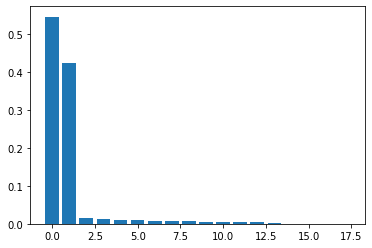

In [85]:
plt.figure()
plt.bar(numericalindicators.index, numericalindicators.mutual_info_classif)
plt.show()